[View in Colaboratory](https://colab.research.google.com/github/abhiksark/kaggle_submissions/blob/master/cats_and_dogs_cnn.ipynb)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import files
uploaded = files.upload()

In [0]:
!mkdir /content/.kaggle
#!mv /content/.kaggle kaggle.json
#!ls
#!chmod 600 ~ kaggle.json
!mv kaggle.json /content/.kaggle
!rm -rf *
!ls /content/.kaggle/
!chmod 600 ~ /content/.kaggle/kaggle.json


In [0]:
!pip install kaggle

!kaggle competitions download -c dogs-vs-cats -p datalab
!ls  datalab/


In [0]:
%%capture
!unzip datalab/test1.zip
!unzip datalab/train.zip


In [0]:
%%capture
!ls
!pip install keras

In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras import regularizers
import shutil

Using TensorFlow backend.


In [0]:
train_dir = 'train/'
test_dir = 'test1/'
train_images_dogs_cats = [train_dir+i for i in os.listdir(train_dir)] # use this for full dataset
test_images_dogs_cats = [train_dir+i for i in os.listdir(train_dir)]

len(train_images_dogs_cats)


In [0]:
!mkdir train/cat/
!mkdir train/dog/
!mkdir val/
!mkdir val/cat/
!mkdir val/dog/

In [0]:
%%capture
src_dir = "train/"
for train_dir in train_images_dogs_cats[:20000]:
      #print(train_dir)
      train_dir_header = train_dir.split("/")
      image_header= train_dir_header[1].split(".") 
      img_class = image_header[0]
      os.rename(train_dir,src_dir + img_class + "/" + train_dir_header[1] )

In [0]:
src_dir = "./val/"
for train_dir in train_images_dogs_cats[20000:]:
      #print(train_dir)
      train_dir_header = train_dir.split("/")
      image_header= train_dir_header[1].split(".") 
      img_class = image_header[0]
      os.rename(train_dir, src_dir + img_class + "/" + train_dir_header[1] )

      
      

In [2]:

train_dir = './train/'

datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


batch_size = 8
 
#train_features = np.zeros(shape=(nTrain, 7, 7, 512))
#train_labels = np.zeros(shape=(nTrain))
 

train_generator = datagen.flow_from_directory(
  
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [3]:
val_dir = './val/'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    samplewise_center=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
 
#train_features = np.zeros(shape=(nTrain, 7, 7, 512))
#train_labels = np.zeros(shape=(nTrain))
 

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(200,200),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [0]:
# number of convolutional filters to use
nb_filters = 20
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 4


# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 64

img_rows, img_cols = 200,200

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import keras

adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.9999, epsilon=None, decay=0.0001, amsgrad=False)

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv))
model.add(MaxPooling2D(pool_size=(nb_pool+1, nb_pool+1)))
model.add(Dropout(0.5))

convout2 = Activation('relu')
model.add(convout2)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+1, nb_pool+1)))
model.add(Dropout(0.5))

convout3 = Activation('relu')
model.add(convout3)
model.add(Convolution2D(nb_filters, nb_conv-2, nb_conv-2))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
#model.add(Dense(680))
#model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (4, 4), input_shape=(200, 200,..., padding="valid")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (2, 2))`


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 197, 197, 20)      980       
_________________________________________________________________
activation_16 (Activation)   (None, 197, 197, 20)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 194, 194, 20)      6420      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 20)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 20)        0         
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 62, 62, 20)        3620      
__________

In [0]:
hist_plot = model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=val_generator, validation_steps=5,workers=5, use_multiprocessing=True)


Epoch 1/50
15/15 [==============================] - 4s 276ms/step - loss: 0.7155 - acc: 0.5500 - val_loss: 0.6918 - val_acc: 0.5250
Epoch 2/50
15/15 [==============================] - 3s 204ms/step - loss: 0.7250 - acc: 0.4333 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/50
15/15 [==============================] - 4s 234ms/step - loss: 0.6888 - acc: 0.5167 - val_loss: 0.6871 - val_acc: 0.6250
Epoch 4/50
15/15 [==============================] - 3s 230ms/step - loss: 0.6917 - acc: 0.4667 - val_loss: 0.6851 - val_acc: 0.6000
Epoch 5/50
15/15 [==============================] - 3s 224ms/step - loss: 0.6839 - acc: 0.5500 - val_loss: 0.6846 - val_acc: 0.6000
Epoch 6/50
15/15 [==============================] - 3s 228ms/step - loss: 0.6645 - acc: 0.5417 - val_loss: 0.6866 - val_acc: 0.5250
Epoch 7/50
15/15 [==============================] - 3s 230ms/step - loss: 0.6986 - acc: 0.5333 - val_loss: 0.6821 - val_acc: 0.5500
Epoch 8/50
 8/15 [===============>..............] - ETA: 0s - loss: 0.7057 -

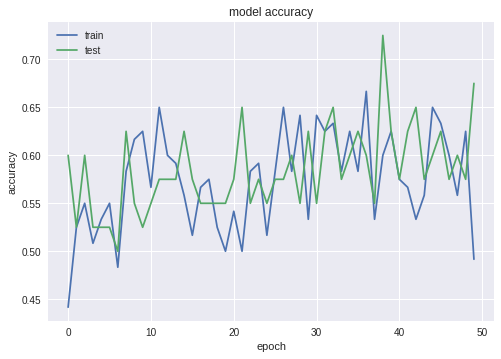

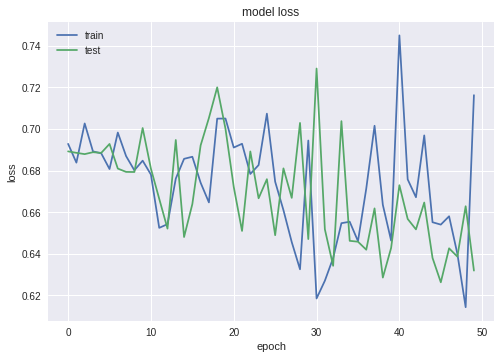

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist_plot.history['acc'])
plt.plot(hist_plot.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_plot.history['loss'])
plt.plot(hist_plot.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist_plot.history['acc'])
plt.plot(hist_plot.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_plot.history['loss'])
plt.plot(hist_plot.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()